<a href="https://colab.research.google.com/github/IfyBillions/Data-Science-Project/blob/main/7153_Big_data_analytics_and_Big_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [993 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,629 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRe

In [ ]:
!ls /usr/lib/jvm

java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64
java-11-openjdk-amd64	   java-8-openjdk-amd64


In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop3.2.tgz

In [ ]:
!tar -xvzf spark-3.2.4-bin-hadoop3.2.tgz

spark-3.2.4-bin-hadoop3.2/
spark-3.2.4-bin-hadoop3.2/R/
spark-3.2.4-bin-hadoop3.2/R/lib/
spark-3.2.4-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/html/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/html/R.css
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/html/00Index.html
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/aliases.rds
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/AnIndex
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/SparkR.rdx
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/SparkR.rdb
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/paths.rds
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/tests/testthat/te

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop3.2"

In [ ]:
!pip install pyspark==3.2.4
!pip install -q findspark
import findspark
findspark.init()
findspark.find()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 19.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.4-py2.py3-none-any.whl size=282040940 sha256=ebf24e030184a6078cb182b7b00aa084fa2cb48566e7f4606c87816f8de9d3c5
  Stored in directory: /root/.cache/pip/wheels/23/b7/78/7ee2975da06bd91492903dc71a17dd87ee851b9ae5b69c85b4
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


'/content/spark-3.2.4-bin-hadoop3.2'

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import *
from pyspark.sql.functions import col, sum
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
spark = SparkSession.builder.appName('Covid-19WorldVaccinationProgress').getOrCreate()
spark

In [ ]:
data = spark.read.csv('/content/country_vaccinations.csv',inferSchema=True,header=True)

In [ ]:
data

DataFrame[country: string, iso_code: string, date: string, total_vaccinations: double, people_vaccinated: double, people_fully_vaccinated: double, daily_vaccinations_raw: double, daily_vaccinations: double, total_vaccinations_per_hundred: double, people_vaccinated_per_hundred: double, people_fully_vaccinated_per_hundred: double, daily_vaccinations_per_million: double, vaccines: string, source_name: string, source_website: string]

In [ ]:
data.show()

+-----------+--------+----------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+--------------------+
|    country|iso_code|      date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|            vaccines|         source_name|      source_website|
+-----------+--------+----------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+--------------------+
|Afghanistan|   

In [ ]:
print('Number of rows:', data.count())
print('Number of columns', len(data.columns))

Number of rows: 86512
Number of columns 15


In [ ]:
data.columns

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [ ]:
data.head

<bound method DataFrame.head of DataFrame[country: string, iso_code: string, date: string, total_vaccinations: double, people_vaccinated: double, people_fully_vaccinated: double, daily_vaccinations_raw: double, daily_vaccinations: double, total_vaccinations_per_hundred: double, people_vaccinated_per_hundred: double, people_fully_vaccinated_per_hundred: double, daily_vaccinations_per_million: double, vaccines: string, source_name: string, source_website: string]>

In [ ]:
data.printSchema()

root
 |-- country: string (nullable = true)
 |-- iso_code: string (nullable = true)
 |-- date: string (nullable = true)
 |-- total_vaccinations: double (nullable = true)
 |-- people_vaccinated: double (nullable = true)
 |-- people_fully_vaccinated: double (nullable = true)
 |-- daily_vaccinations_raw: double (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- total_vaccinations_per_hundred: double (nullable = true)
 |-- people_vaccinated_per_hundred: double (nullable = true)
 |-- people_fully_vaccinated_per_hundred: double (nullable = true)
 |-- daily_vaccinations_per_million: double (nullable = true)
 |-- vaccines: string (nullable = true)
 |-- source_name: string (nullable = true)
 |-- source_website: string (nullable = true)



In [ ]:

data = data.withColumn("date", to_timestamp("date", "yyyy-MM-dd"))
data.show()


+-----------+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+--------------------+
|    country|iso_code|               date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|            vaccines|         source_name|      source_website|
+-----------+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+-----------

In [ ]:
data.printSchema()

root
 |-- country: string (nullable = true)
 |-- iso_code: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- total_vaccinations: double (nullable = true)
 |-- people_vaccinated: double (nullable = true)
 |-- people_fully_vaccinated: double (nullable = true)
 |-- daily_vaccinations_raw: double (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- total_vaccinations_per_hundred: double (nullable = true)
 |-- people_vaccinated_per_hundred: double (nullable = true)
 |-- people_fully_vaccinated_per_hundred: double (nullable = true)
 |-- daily_vaccinations_per_million: double (nullable = true)
 |-- vaccines: string (nullable = true)
 |-- source_name: string (nullable = true)
 |-- source_website: string (nullable = true)



In [ ]:
data.describe().show()

+-------+-----------+--------+--------------------+-------------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+--------------------+
|summary|    country|iso_code|  total_vaccinations|  people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|            vaccines|         source_name|      source_website|
+-------+-----------+--------+--------------------+-------------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+--------------------+
|  count|    

In [ ]:
data.select("total_vaccinations","daily_vaccinations","daily_vaccinations_per_million").summary("count","min","25%","50%","75%","max").toPandas()

,summary,total_vaccinations,daily_vaccinations,daily_vaccinations_per_million
0,count,43607,86213,86213
1,min,0.0,0.0,0.0
2,25%,526414.0,899.0,636.0
3,50%,3587683.0,7340.0,2049.0
4,75%,1.7009581E7,44074.0,4681.0
5,max,3.263129E9,2.2424286E7,117497.0


In [ ]:
data.groupBy("country").count().show()

+-----------+-----+
|    country|count|
+-----------+-----+
|       Chad|  282|
|   Anguilla|  415|
|      Macao|  414|
|   Kiribati|  294|
|     Guyana|  408|
|     Jersey|  372|
|   Djibouti|  338|
|   Malaysia|  399|
|       Fiji|  377|
|     Malawi|  362|
|       Iraq|  388|
|    Germany|  458|
|    Comoros|  335|
|Afghanistan|  394|
|   Cambodia|  413|
|     Jordan|  423|
|   Maldives|  404|
|     France|  457|
|     Greece|  457|
|     Kosovo|  367|
+-----------+-----+
only showing top 20 rows



In [ ]:
data.groupBy("country").mean("total_vaccinations").show()

+-----------+-----------------------+
|    country|avg(total_vaccinations)|
+-----------+-----------------------+
|       Chad|     174859.07317073172|
|   Anguilla|      16462.38775510204|
|      Macao|     523465.28819444444|
|   Kiribati|      67827.13333333333|
|     Guyana|      525207.0540540541|
|     Jersey|       155869.816091954|
|   Djibouti|               91263.15|
|   Malaysia|   3.3327101984962407E7|
|       Fiji|               835713.4|
|     Malawi|     1035559.3073929962|
|       Iraq|      8620826.689655172|
|    Germany|      8.5115350069869E7|
|    Comoros|     329871.03225806454|
|Afghanistan|     2566117.9565217393|
|   Cambodia|   1.7606258424242426E7|
|     Jordan|      5950272.331658292|
|   Maldives|      550690.2083333334|
|     France|    7.040927652516411E7|
|     Greece|   1.0157687230593607E7|
|     Kosovo|     1314771.7983193276|
+-----------+-----------------------+
only showing top 20 rows



In [ ]:

# Count the number of missing values in each column
missing_ = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])

# Show the results
missing_.toPandas()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,0,0,42905,45218,47710,51150,299,42905,45218,47710,299,0,0,0


Fill in the Missing Values

In [ ]:
data_fill = data.fillna(0)
data_fill.show()

+-----------+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+--------------------+
|    country|iso_code|               date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|            vaccines|         source_name|      source_website|
+-----------+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+--------------------+--------------------+-----------

Dropping the last 3 columns


In [ ]:
data_fill = data_fill.drop("vaccines","source_name","source_website")
data_fill.show()

+-----------+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+
|    country|iso_code|               date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|
+-----------+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+
|Afghanistan|     AFG|2021-02-22 00:00:00|               0.0|              0.0|                    0.0|                   0.0|               0.0|                           0.0|  

In [ ]:
## converting categorical variables into numerical using the StringIndexer

indexer = StringIndexer(inputCol="country", outputCol="country_index")
data_fill = indexer.fit(data_fill).transform(data_fill)
data_fill = data_fill.drop("country")

indexer = StringIndexer(inputCol="iso_code", outputCol="iso_code_index")
data_fill = indexer.fit(data_fill).transform(data_fill)
data_19_fill = data_fill.drop("iso_code")

In [ ]:
data_fill.show()

+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+-------------+--------------+
|iso_code|               date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|country_index|iso_code_index|
+--------+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+-------------+--------------+
|     AFG|2021-02-22 00:00:00|               0.0|              0.0|                    0.0|                   0.0|             

In [ ]:
data_fill = data_fill.drop("country","iso_code")
data_fill.show()

+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+-------------+--------------+
|               date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|country_index|iso_code_index|
+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+-------------+--------------+
|2021-02-22 00:00:00|               0.0|              0.0|                    0.0|                   0.0|               0.0|                           0.0

MACHINE LEARNING ALGORITHMS OF COVID-19 WORLD VACCINATION PROGRESS

In [ ]:
# Creating the VectorAssembler for the dataset
input_columns = data_fill.columns
input_columns = input_columns[1:]

# create the vector
vecAssembler = VectorAssembler(inputCols=input_columns, outputCol="features")
data_fill_Kmeans = vecAssembler.transform(data_fill)
data_fill_Kmeans.show()

+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+-------------+--------------+--------------------+
|               date|total_vaccinations|people_vaccinated|people_fully_vaccinated|daily_vaccinations_raw|daily_vaccinations|total_vaccinations_per_hundred|people_vaccinated_per_hundred|people_fully_vaccinated_per_hundred|daily_vaccinations_per_million|country_index|iso_code_index|            features|
+-------------------+------------------+-----------------+-----------------------+----------------------+------------------+------------------------------+-----------------------------+-----------------------------------+------------------------------+-------------+--------------+--------------------+
|2021-02-22 00:00:00|               0.0|              0.0|                    0.0|         

In [ ]:
# set a max for the number of Clusters needed
kmax = 50
# creating an array filled with zeros for the amount of K
kmcost = np.zeros(kmax)
for k in range(2,kmax):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    # Fit to dataset
    model = kmeans.fit(data_fill_Kmeans)

    # compute the "cost" (sum of squared distances) between the input points and their corresponding clusters centers
    kmcost[k] = model.summary.trainingCost

print(kmcost[2:kmax])


[6.57100772e+20 4.45734298e+20 2.72064524e+20 2.16943897e+20
 1.83353312e+20 1.20937159e+20 1.00001200e+20 9.17617358e+19
 8.30661215e+19 5.75443397e+19 5.51122408e+19 3.87973552e+19
 3.49721105e+19 3.34978073e+19 2.98452309e+19 2.79809918e+19
 2.65633897e+19 2.20109682e+19 2.02002296e+19 1.76913059e+19
 1.71668231e+19 1.58259910e+19 1.44171423e+19 1.34508811e+19
 1.31867776e+19 1.30300076e+19 1.14960443e+19 1.12491736e+19
 1.03517410e+19 9.78861805e+18 1.00421492e+19 1.00604699e+19
 9.23866347e+18 8.53939887e+18 8.54152867e+18 8.16542008e+18
 7.53232336e+18 7.23978212e+18 7.03464124e+18 6.32058491e+18
 6.15687519e+18 6.27205588e+18 5.73131415e+18 5.77022276e+18
 5.28669690e+18 5.58673226e+18 5.05203811e+18 5.04081572e+18]


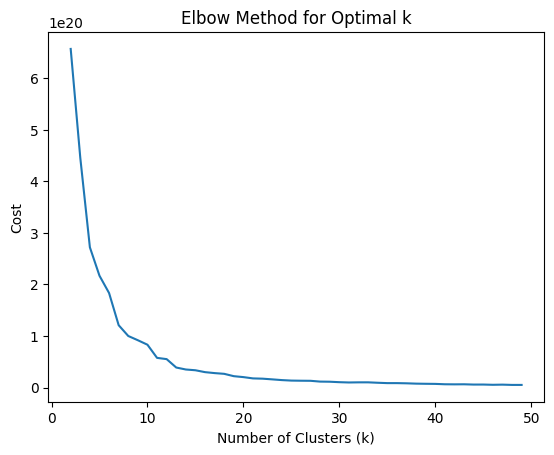

In [ ]:
#plot the cost vs number of clusters
plt.plot(range(2,kmax), kmcost[2:kmax])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
## Fit the final model
k = 10
kmeans = KMeans().setK(k).setSeed(3).setFeaturesCol("features")
model = kmeans.fit(data_fill_Kmeans)

predictions = model.transform(data_fill_Kmeans)

evaluator = ClusteringEvaluator()

silhouette_score = evaluator.evaluate(predictions)
print("Silhouette score = " + str(silhouette_score))

Silhouette score = 0.9299426707939177


In [ ]:
centers = model.clusterCenters()
for center in centers:
    print(center)

[2.15477673e+06 1.15606436e+06 8.04410943e+05 1.76562890e+04
 3.65188182e+04 3.09662301e+01 1.51619136e+01 1.22146687e+01
 3.05779099e+03 1.06221750e+02 1.06239800e+02]
[1.99141822e+09 0.00000000e+00 5.67186861e+06 8.29904380e+06
 8.58555577e+06 1.37889124e+02 0.00000000e+00 3.92700730e-01
 5.94480292e+03 5.00000000e+00 5.00000000e+00]
[1.66395071e+09 9.31366657e+08 7.20196625e+08 4.73981588e+06
 4.89532993e+06 1.19267103e+02 6.67633645e+01 5.16181308e+01
 3.50718692e+03 5.45700935e+01 5.45700935e+01]
[2.75790607e+09 6.56149148e+08 1.17055381e+09 6.70307407e+06
 6.40865604e+06 1.90962222e+02 4.54322222e+01 8.10507407e+01
 4.43744444e+03 5.00000000e+00 5.00000000e+00]
[1.37736730e+08 6.63752927e+07 5.28292365e+07 6.28825785e+05
 6.65569094e+05 1.39943777e+02 6.34330714e+01 5.52440210e+01
 4.42819790e+03 5.11327731e+01 5.07995798e+01]
[2.94078357e+09 0.00000000e+00 0.00000000e+00 6.30656731e+06
 6.45330631e+06 2.03624808e+02 0.00000000e+00 0.00000000e+00
 4.46836538e+03 5.00000000e+00 5.

In [ ]:
predictions.toPandas()

/content/spark-3.2.4-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country_index,iso_code_index,features,prediction
0,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,119.0,119.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,119.0,119.0,"(0.0, 0.0, 0.0, 0.0, 1367.0, 0.0, 0.0, 0.0, 34...",0
2,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,119.0,119.0,"(0.0, 0.0, 0.0, 0.0, 1367.0, 0.0, 0.0, 0.0, 34...",0
3,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,119.0,119.0,"(0.0, 0.0, 0.0, 0.0, 1367.0, 0.0, 0.0, 0.0, 34...",0
4,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,119.0,119.0,"(0.0, 0.0, 0.0, 0.0, 1367.0, 0.0, 0.0, 0.0, 34...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,100.0,100.0,"[8691642.0, 4814582.0, 3473523.0, 139213.0, 69...",0
86508,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,100.0,100.0,"[8791728.0, 4886242.0, 3487962.0, 100086.0, 83...",0
86509,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,100.0,100.0,"[8845039.0, 4918147.0, 3493763.0, 53311.0, 906...",0
86510,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,100.0,100.0,"[8934360.0, 4975433.0, 3501493.0, 89321.0, 100...",0


In [ ]:
predictions.groupBy("prediction").agg(min(predictions.total_vaccinations), max(predictions.total_vaccinations)).show()


+----------+-----------------------+-----------------------+
|prediction|min(total_vaccinations)|max(total_vaccinations)|
+----------+-----------------------+-----------------------+
|         1|             1.283175E9|              2.46433E9|
|         6|           7.61350715E8|          1.352485358E9|
|         3|             2.161428E9|             3.243599E9|
|         5|             2.472847E9|             3.263129E9|
|         9|           2.28041045E8|              5.27253E8|
|         4|                    0.0|              3.42697E8|
|         8|                    0.0|              1.26616E8|
|         7|           4.50706257E8|             1.264149E9|
|         2|          1.356491248E9|             2.174043E9|
|         0|                    0.0|                4.052E7|
+----------+-----------------------+-----------------------+



In [ ]:
kmax = 50
bkmcost = np.zeros(kmax)
for k in range(2, kmax):
  bkmeans = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
  model_bk = bkmeans.fit(data_fill_Kmeans)
  bkmcost[k] = model_bk.summary.trainingCost


In [ ]:
print(bkmcost[2:kmax])

[6.57100772e+20 4.77972412e+20 2.74272126e+20 2.22052392e+20
 2.00215816e+20 1.61255206e+20 1.24970457e+20 1.19935856e+20
 1.14855751e+20 1.09532861e+20 1.03944402e+20 9.99563972e+19
 9.50868991e+19 6.01785537e+19 4.15816058e+19 4.08313974e+19
 4.02290716e+19 3.94624200e+19 3.87060813e+19 3.82639715e+19
 3.78192483e+19 3.30840286e+19 3.12239295e+19 2.99224007e+19
 2.93397156e+19 2.87387554e+19 2.82148461e+19 2.76806684e+19
 2.16188731e+19 2.09150010e+19 1.28166503e+19 1.27480680e+19
 1.26893120e+19 1.26191629e+19 1.25294623e+19 1.24518845e+19
 1.10167620e+19 1.08321509e+19 1.06739245e+19 1.00842048e+19
 9.76129378e+18 9.04404193e+18 8.95480057e+18 8.88149155e+18
 8.67990271e+18 8.32566053e+18 8.21427195e+18 7.51458504e+18]


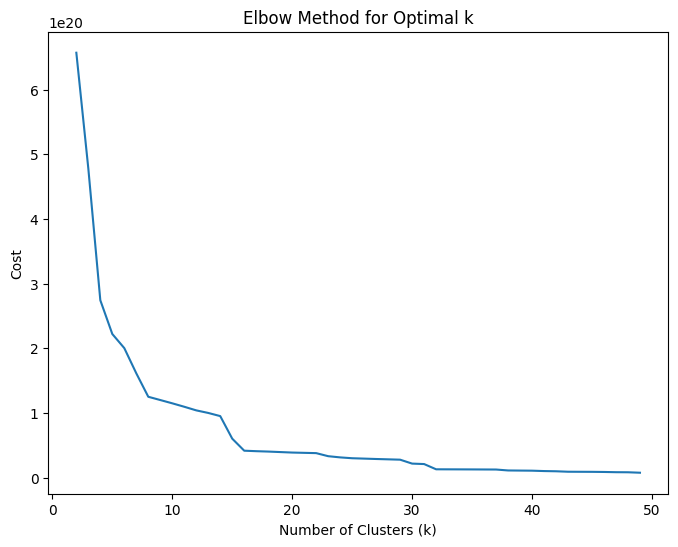

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,kmax),bkmcost[2:kmax])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
## Fit the final model
k = 10
bkmeans = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = bkmeans.fit(data_fill_Kmeans)

predictions = model.transform(data_fill_Kmeans)

evaluator = ClusteringEvaluator()

silhouette_bkmeans = evaluator.evaluate(predictions)
print("Silhouette score = " + str(silhouette_bkmeans))

Silhouette score = 0.8962481958051738
